In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import os

df = pd.read_csv("/Users/user/java-web-project0208/python-basic/dataset/breast-cancer-wisconsin.csv",
                names =["id","Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape",
                       "Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin"
                       ,"Normal_Nucleoli","Mitoses","Classes"])

In [3]:
# df.loc[df.Bare_Nuclei == '?', 'Bare_Nuclei'] ='0'
tmp = df[df['Bare_Nuclei'] == '?'].index
df.drop(tmp, inplace=True)

df.loc[df.Classes == 2, 'Classes'] = '0'
df.loc[df.Classes == 4, 'Classes'] = '1'

In [12]:
print(df.head(150))

          id  Clump_Thickness  Uniformity_of_Cell_Size  \
0    1000025                5                        1   
1    1002945                5                        4   
2    1015425                3                        1   
3    1016277                6                        8   
4    1017023                4                        1   
..       ...              ...                      ...   
149  1187805                8                        8   
150  1188472                1                        1   
151  1189266                7                        2   
152  1189286               10                       10   
153  1190394                4                        1   

     Uniformity_of_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1            

In [ ]:
df.corr()
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [4]:
dataset = df.values.astype(float)

X = dataset[:, 1:10]
Y = dataset[:, 10]

n_fold = 10
skf= StratifiedKFold(n_splits=n_fold, shuffle=True)

accuracy = []

for train, test in skf.split(X,Y):
    model = Sequential()
    model.add(Dense(32, input_dim=9, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X[train], Y[train], epochs=100, batch_size=8, validation_data=(X[test],Y[test]))
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Train on 614 samples, validate on 69 samples
Epoch 1/100
614/614 [==============================] - 5s 7ms/sample - loss: 0.5805 - accuracy: 0.6775 - val_loss: 0.4796 - val_accuracy: 0.8261
Epoch 2/100
614/614 [==============================] - 1s 888us/sample - loss: 0.4107 - accuracy: 0.8860 - val_loss: 0.3846 - val_accuracy: 0.8986
Epoch 3/100
614/614 [==============================] - 1s 833us/sample - loss: 0.3354 - accuracy: 0.9072 - val_loss: 0.3308 - val_accuracy: 0.8841
Epoch 4/100
614/614 [==============================] - 0s 790us/sample - loss: 0.2842 - accuracy: 0.9300 - val_loss: 0.2953 - val_accuracy: 0.8986
Epoch 5/100
614/614 [==============================] - 1s 922us/sample - loss: 0.2519 - accuracy: 0.9414 - val_loss: 0.2693 - val_accuracy: 0.9130
Epoch 6/100
614/614 [==============================] - 1s 1ms/sample - loss: 0.2253 - accuracy: 0.9495 - val_loss: 0.2279 - val_accuracy: 0.9275
Epoch 7/100
614/614 [==============================] - 0s 756us/sample - loss

614/614 [==============================] - 0s 643us/sample - loss: 0.0559 - accuracy: 0.9805 - val_loss: 0.1116 - val_accuracy: 0.9420
Epoch 57/100
614/614 [==============================] - 0s 644us/sample - loss: 0.0514 - accuracy: 0.9805 - val_loss: 0.1145 - val_accuracy: 0.9420
Epoch 58/100
614/614 [==============================] - 0s 676us/sample - loss: 0.0545 - accuracy: 0.9805 - val_loss: 0.1088 - val_accuracy: 0.9420
Epoch 59/100
614/614 [==============================] - 0s 687us/sample - loss: 0.0507 - accuracy: 0.9772 - val_loss: 0.1123 - val_accuracy: 0.9420
Epoch 60/100
614/614 [==============================] - 0s 668us/sample - loss: 0.0550 - accuracy: 0.9788 - val_loss: 0.1174 - val_accuracy: 0.9420
Epoch 61/100
614/614 [==============================] - 0s 667us/sample - loss: 0.0502 - accuracy: 0.9788 - val_loss: 0.1140 - val_accuracy: 0.9420
Epoch 62/100
614/614 [==============================] - 0s 658us/sample - loss: 0.0488 - accuracy: 0.9837 - val_loss: 0.1141 

Train on 614 samples, validate on 69 samples
Epoch 1/100
614/614 [==============================] - 5s 8ms/sample - loss: 0.6341 - accuracy: 0.5782 - val_loss: 0.4948 - val_accuracy: 0.7536
Epoch 2/100
614/614 [==============================] - 1s 832us/sample - loss: 0.4273 - accuracy: 0.8844 - val_loss: 0.3681 - val_accuracy: 0.9420
Epoch 3/100
614/614 [==============================] - 0s 749us/sample - loss: 0.3465 - accuracy: 0.9023 - val_loss: 0.3120 - val_accuracy: 0.9275
Epoch 4/100
614/614 [==============================] - 0s 747us/sample - loss: 0.2987 - accuracy: 0.9283 - val_loss: 0.2703 - val_accuracy: 0.9130
Epoch 5/100
614/614 [==============================] - 0s 690us/sample - loss: 0.2698 - accuracy: 0.9300 - val_loss: 0.2419 - val_accuracy: 0.9420
Epoch 6/100
614/614 [==============================] - 0s 692us/sample - loss: 0.2449 - accuracy: 0.9430 - val_loss: 0.2186 - val_accuracy: 0.9420
Epoch 7/100
614/614 [==============================] - 0s 695us/sample - lo

614/614 [==============================] - 0s 781us/sample - loss: 0.0502 - accuracy: 0.9788 - val_loss: 0.0573 - val_accuracy: 0.9565
Epoch 56/100
614/614 [==============================] - 0s 743us/sample - loss: 0.0523 - accuracy: 0.9788 - val_loss: 0.0685 - val_accuracy: 0.9565
Epoch 57/100
614/614 [==============================] - 0s 634us/sample - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0648 - val_accuracy: 0.9565
Epoch 58/100
614/614 [==============================] - 0s 656us/sample - loss: 0.0494 - accuracy: 0.9805 - val_loss: 0.1342 - val_accuracy: 0.9565
Epoch 59/100
614/614 [==============================] - 0s 716us/sample - loss: 0.0560 - accuracy: 0.9739 - val_loss: 0.0592 - val_accuracy: 0.9710
Epoch 60/100
614/614 [==============================] - 0s 763us/sample - loss: 0.0477 - accuracy: 0.9837 - val_loss: 0.0685 - val_accuracy: 0.9565
Epoch 61/100
614/614 [==============================] - 0s 755us/sample - loss: 0.0478 - accuracy: 0.9788 - val_loss: 0.0783 

Train on 614 samples, validate on 69 samples
Epoch 1/100
614/614 [==============================] - 3s 4ms/sample - loss: 0.5218 - accuracy: 0.7443 - val_loss: 0.4772 - val_accuracy: 0.8551
Epoch 2/100
614/614 [==============================] - 0s 572us/sample - loss: 0.3847 - accuracy: 0.9088 - val_loss: 0.4072 - val_accuracy: 0.8551
Epoch 3/100
614/614 [==============================] - 0s 647us/sample - loss: 0.3288 - accuracy: 0.9300 - val_loss: 0.3631 - val_accuracy: 0.8841
Epoch 4/100
614/614 [==============================] - 0s 679us/sample - loss: 0.2821 - accuracy: 0.9332 - val_loss: 0.3109 - val_accuracy: 0.9420
Epoch 5/100
614/614 [==============================] - 0s 692us/sample - loss: 0.2531 - accuracy: 0.9430 - val_loss: 0.3053 - val_accuracy: 0.9275
Epoch 6/100
614/614 [==============================] - 0s 627us/sample - loss: 0.2283 - accuracy: 0.9446 - val_loss: 0.2980 - val_accuracy: 0.9275
Epoch 7/100
614/614 [==============================] - 0s 704us/sample - lo

614/614 [==============================] - 0s 672us/sample - loss: 0.0543 - accuracy: 0.9788 - val_loss: 0.1703 - val_accuracy: 0.9565
Epoch 57/100
614/614 [==============================] - 0s 756us/sample - loss: 0.0542 - accuracy: 0.9756 - val_loss: 0.1752 - val_accuracy: 0.9565
Epoch 58/100
614/614 [==============================] - 0s 679us/sample - loss: 0.0543 - accuracy: 0.9805 - val_loss: 0.1588 - val_accuracy: 0.9565
Epoch 59/100
614/614 [==============================] - 0s 651us/sample - loss: 0.0562 - accuracy: 0.9772 - val_loss: 0.1640 - val_accuracy: 0.9565
Epoch 60/100
614/614 [==============================] - 0s 653us/sample - loss: 0.0516 - accuracy: 0.9772 - val_loss: 0.1936 - val_accuracy: 0.9710
Epoch 61/100
614/614 [==============================] - 0s 723us/sample - loss: 0.0514 - accuracy: 0.9788 - val_loss: 0.1867 - val_accuracy: 0.9710
Epoch 62/100
614/614 [==============================] - 0s 670us/sample - loss: 0.0588 - accuracy: 0.9739 - val_loss: 0.1547 

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 2s 4ms/sample - loss: 0.6178 - accuracy: 0.6894 - val_loss: 0.5225 - val_accuracy: 0.8088
Epoch 2/100
615/615 [==============================] - 0s 635us/sample - loss: 0.4200 - accuracy: 0.8911 - val_loss: 0.4469 - val_accuracy: 0.8382
Epoch 3/100
615/615 [==============================] - 0s 724us/sample - loss: 0.3418 - accuracy: 0.9057 - val_loss: 0.4011 - val_accuracy: 0.8971
Epoch 4/100
615/615 [==============================] - 0s 705us/sample - loss: 0.2945 - accuracy: 0.9252 - val_loss: 0.3737 - val_accuracy: 0.8971
Epoch 5/100
615/615 [==============================] - 0s 677us/sample - loss: 0.2514 - accuracy: 0.9382 - val_loss: 0.3623 - val_accuracy: 0.8971
Epoch 6/100
615/615 [==============================] - 0s 619us/sample - loss: 0.2237 - accuracy: 0.9463 - val_loss: 0.3522 - val_accuracy: 0.8971
Epoch 7/100
615/615 [==============================] - 0s 676us/sample - lo

615/615 [==============================] - 0s 733us/sample - loss: 0.0469 - accuracy: 0.9789 - val_loss: 0.2222 - val_accuracy: 0.8971
Epoch 57/100
615/615 [==============================] - 0s 671us/sample - loss: 0.0457 - accuracy: 0.9837 - val_loss: 0.2081 - val_accuracy: 0.9118
Epoch 58/100
615/615 [==============================] - 0s 625us/sample - loss: 0.0446 - accuracy: 0.9837 - val_loss: 0.2185 - val_accuracy: 0.8971
Epoch 59/100
615/615 [==============================] - 0s 772us/sample - loss: 0.0450 - accuracy: 0.9805 - val_loss: 0.2168 - val_accuracy: 0.9118
Epoch 60/100
615/615 [==============================] - 0s 738us/sample - loss: 0.0452 - accuracy: 0.9837 - val_loss: 0.2155 - val_accuracy: 0.8971
Epoch 61/100
615/615 [==============================] - 0s 689us/sample - loss: 0.0481 - accuracy: 0.9821 - val_loss: 0.2031 - val_accuracy: 0.9118
Epoch 62/100
615/615 [==============================] - 0s 782us/sample - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.2176 

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 2s 4ms/sample - loss: 0.5422 - accuracy: 0.7610 - val_loss: 0.4888 - val_accuracy: 0.8676
Epoch 2/100
615/615 [==============================] - 0s 643us/sample - loss: 0.4306 - accuracy: 0.9008 - val_loss: 0.3894 - val_accuracy: 0.9118
Epoch 3/100
615/615 [==============================] - 0s 669us/sample - loss: 0.3579 - accuracy: 0.9171 - val_loss: 0.3287 - val_accuracy: 0.9265
Epoch 4/100
615/615 [==============================] - 0s 619us/sample - loss: 0.3117 - accuracy: 0.9236 - val_loss: 0.2799 - val_accuracy: 0.9559
Epoch 5/100
615/615 [==============================] - 0s 618us/sample - loss: 0.2761 - accuracy: 0.9317 - val_loss: 0.2401 - val_accuracy: 0.9412
Epoch 6/100
615/615 [==============================] - 0s 663us/sample - loss: 0.2437 - accuracy: 0.9447 - val_loss: 0.2179 - val_accuracy: 0.9559
Epoch 7/100
615/615 [==============================] - 0s 685us/sample - lo

615/615 [==============================] - 0s 702us/sample - loss: 0.0545 - accuracy: 0.9789 - val_loss: 0.0836 - val_accuracy: 0.9559
Epoch 57/100
615/615 [==============================] - 0s 633us/sample - loss: 0.0564 - accuracy: 0.9772 - val_loss: 0.0853 - val_accuracy: 0.9559
Epoch 58/100
615/615 [==============================] - 0s 669us/sample - loss: 0.0587 - accuracy: 0.9772 - val_loss: 0.0826 - val_accuracy: 0.9412
Epoch 59/100
615/615 [==============================] - 0s 682us/sample - loss: 0.0533 - accuracy: 0.9789 - val_loss: 0.1110 - val_accuracy: 0.9559
Epoch 60/100
615/615 [==============================] - 0s 637us/sample - loss: 0.0580 - accuracy: 0.9805 - val_loss: 0.0974 - val_accuracy: 0.9559
Epoch 61/100
615/615 [==============================] - 0s 704us/sample - loss: 0.0526 - accuracy: 0.9821 - val_loss: 0.0927 - val_accuracy: 0.9706
Epoch 62/100
615/615 [==============================] - 0s 660us/sample - loss: 0.0535 - accuracy: 0.9805 - val_loss: 0.0809 

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 2s 4ms/sample - loss: 0.6276 - accuracy: 0.8016 - val_loss: 0.4445 - val_accuracy: 0.8824
Epoch 2/100
615/615 [==============================] - 0s 662us/sample - loss: 0.4249 - accuracy: 0.8927 - val_loss: 0.3406 - val_accuracy: 0.9265
Epoch 3/100
615/615 [==============================] - 0s 622us/sample - loss: 0.3677 - accuracy: 0.9008 - val_loss: 0.2889 - val_accuracy: 0.9412
Epoch 4/100
615/615 [==============================] - 0s 700us/sample - loss: 0.3297 - accuracy: 0.9089 - val_loss: 0.2442 - val_accuracy: 0.9706
Epoch 5/100
615/615 [==============================] - 0s 668us/sample - loss: 0.2985 - accuracy: 0.9187 - val_loss: 0.2127 - val_accuracy: 0.9706
Epoch 6/100
615/615 [==============================] - 0s 653us/sample - loss: 0.2738 - accuracy: 0.9285 - val_loss: 0.1851 - val_accuracy: 0.9559
Epoch 7/100
615/615 [==============================] - 0s 618us/sample - lo

615/615 [==============================] - 0s 655us/sample - loss: 0.0541 - accuracy: 0.9805 - val_loss: 0.0433 - val_accuracy: 0.9853
Epoch 57/100
615/615 [==============================] - 0s 676us/sample - loss: 0.0534 - accuracy: 0.9805 - val_loss: 0.0304 - val_accuracy: 0.9853
Epoch 58/100
615/615 [==============================] - 0s 689us/sample - loss: 0.0518 - accuracy: 0.9821 - val_loss: 0.0304 - val_accuracy: 0.9853
Epoch 59/100
615/615 [==============================] - 0s 618us/sample - loss: 0.0533 - accuracy: 0.9772 - val_loss: 0.0297 - val_accuracy: 0.9853
Epoch 60/100
615/615 [==============================] - 0s 565us/sample - loss: 0.0513 - accuracy: 0.9821 - val_loss: 0.0398 - val_accuracy: 0.9853
Epoch 61/100
615/615 [==============================] - 0s 678us/sample - loss: 0.0523 - accuracy: 0.9756 - val_loss: 0.0307 - val_accuracy: 0.9853
Epoch 62/100
615/615 [==============================] - 0s 660us/sample - loss: 0.0523 - accuracy: 0.9821 - val_loss: 0.0249 

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 2s 4ms/sample - loss: 0.5484 - accuracy: 0.7480 - val_loss: 0.4294 - val_accuracy: 0.8824
Epoch 2/100
615/615 [==============================] - 0s 669us/sample - loss: 0.4128 - accuracy: 0.8764 - val_loss: 0.3481 - val_accuracy: 0.8824
Epoch 3/100
615/615 [==============================] - 0s 655us/sample - loss: 0.3499 - accuracy: 0.8976 - val_loss: 0.3002 - val_accuracy: 0.9118
Epoch 4/100
615/615 [==============================] - 0s 642us/sample - loss: 0.3138 - accuracy: 0.9106 - val_loss: 0.2521 - val_accuracy: 0.9265
Epoch 5/100
615/615 [==============================] - 0s 679us/sample - loss: 0.2774 - accuracy: 0.9138 - val_loss: 0.2263 - val_accuracy: 0.9412
Epoch 6/100
615/615 [==============================] - 0s 648us/sample - loss: 0.2508 - accuracy: 0.9317 - val_loss: 0.2010 - val_accuracy: 0.9412
Epoch 7/100
615/615 [==============================] - 0s 705us/sample - lo

615/615 [==============================] - 0s 712us/sample - loss: 0.0551 - accuracy: 0.9756 - val_loss: 0.0349 - val_accuracy: 0.9853
Epoch 57/100
615/615 [==============================] - 0s 655us/sample - loss: 0.0584 - accuracy: 0.9756 - val_loss: 0.0424 - val_accuracy: 0.9706
Epoch 58/100
615/615 [==============================] - 0s 683us/sample - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0341 - val_accuracy: 0.9853
Epoch 59/100
615/615 [==============================] - 0s 683us/sample - loss: 0.0612 - accuracy: 0.9789 - val_loss: 0.0481 - val_accuracy: 0.9706
Epoch 60/100
615/615 [==============================] - 0s 709us/sample - loss: 0.0573 - accuracy: 0.9756 - val_loss: 0.0351 - val_accuracy: 0.9853
Epoch 61/100
615/615 [==============================] - 0s 644us/sample - loss: 0.0532 - accuracy: 0.9805 - val_loss: 0.0358 - val_accuracy: 0.9853
Epoch 62/100
615/615 [==============================] - 0s 701us/sample - loss: 0.0540 - accuracy: 0.9789 - val_loss: 0.0349 

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 3s 4ms/sample - loss: 0.7903 - accuracy: 0.5837 - val_loss: 0.5503 - val_accuracy: 0.7941
Epoch 2/100
615/615 [==============================] - 0s 771us/sample - loss: 0.4993 - accuracy: 0.8293 - val_loss: 0.4047 - val_accuracy: 0.8971
Epoch 3/100
615/615 [==============================] - 1s 836us/sample - loss: 0.3879 - accuracy: 0.9041 - val_loss: 0.3137 - val_accuracy: 0.8971
Epoch 4/100
615/615 [==============================] - 1s 952us/sample - loss: 0.3221 - accuracy: 0.9236 - val_loss: 0.2716 - val_accuracy: 0.9265
Epoch 5/100
615/615 [==============================] - 0s 800us/sample - loss: 0.2775 - accuracy: 0.9398 - val_loss: 0.2377 - val_accuracy: 0.9412
Epoch 6/100
615/615 [==============================] - 1s 861us/sample - loss: 0.2436 - accuracy: 0.9480 - val_loss: 0.2123 - val_accuracy: 0.9412
Epoch 7/100
615/615 [==============================] - 0s 763us/sample - lo

615/615 [==============================] - 0s 750us/sample - loss: 0.0622 - accuracy: 0.9821 - val_loss: 0.1131 - val_accuracy: 0.9412
Epoch 57/100
615/615 [==============================] - 0s 692us/sample - loss: 0.0606 - accuracy: 0.9772 - val_loss: 0.0723 - val_accuracy: 0.9706
Epoch 58/100
615/615 [==============================] - 0s 675us/sample - loss: 0.0583 - accuracy: 0.9805 - val_loss: 0.0607 - val_accuracy: 0.9706
Epoch 59/100
615/615 [==============================] - 0s 609us/sample - loss: 0.0583 - accuracy: 0.9789 - val_loss: 0.0798 - val_accuracy: 0.9559
Epoch 60/100
615/615 [==============================] - 1s 832us/sample - loss: 0.0606 - accuracy: 0.9756 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 61/100
615/615 [==============================] - 1s 1ms/sample - loss: 0.0616 - accuracy: 0.9772 - val_loss: 0.0523 - val_accuracy: 0.9706
Epoch 62/100
615/615 [==============================] - 1s 1ms/sample - loss: 0.0576 - accuracy: 0.9805 - val_loss: 0.0604 - va

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 4s 6ms/sample - loss: 1.0037 - accuracy: 0.3171 - val_loss: 0.6955 - val_accuracy: 0.3235
Epoch 2/100
615/615 [==============================] - 0s 686us/sample - loss: 0.5644 - accuracy: 0.7187 - val_loss: 0.4861 - val_accuracy: 0.8676
Epoch 3/100
615/615 [==============================] - 1s 920us/sample - loss: 0.4220 - accuracy: 0.9024 - val_loss: 0.3904 - val_accuracy: 0.9118
Epoch 4/100
615/615 [==============================] - 0s 775us/sample - loss: 0.3386 - accuracy: 0.9220 - val_loss: 0.3381 - val_accuracy: 0.9118
Epoch 5/100
615/615 [==============================] - 0s 782us/sample - loss: 0.2893 - accuracy: 0.9382 - val_loss: 0.3040 - val_accuracy: 0.9265
Epoch 6/100
615/615 [==============================] - 0s 780us/sample - loss: 0.2503 - accuracy: 0.9398 - val_loss: 0.2770 - val_accuracy: 0.9559
Epoch 7/100
615/615 [==============================] - 0s 770us/sample - lo

615/615 [==============================] - 1s 824us/sample - loss: 0.0539 - accuracy: 0.9821 - val_loss: 0.0818 - val_accuracy: 0.9706
Epoch 57/100
615/615 [==============================] - 0s 717us/sample - loss: 0.0501 - accuracy: 0.9821 - val_loss: 0.0869 - val_accuracy: 0.9706
Epoch 58/100
615/615 [==============================] - 1s 907us/sample - loss: 0.0488 - accuracy: 0.9789 - val_loss: 0.0796 - val_accuracy: 0.9706
Epoch 59/100
615/615 [==============================] - 0s 707us/sample - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0792 - val_accuracy: 0.9706
Epoch 60/100
615/615 [==============================] - 0s 772us/sample - loss: 0.0487 - accuracy: 0.9870 - val_loss: 0.0818 - val_accuracy: 0.9706
Epoch 61/100
615/615 [==============================] - 1s 1ms/sample - loss: 0.0497 - accuracy: 0.9821 - val_loss: 0.0866 - val_accuracy: 0.9706
Epoch 62/100
615/615 [==============================] - 1s 1ms/sample - loss: 0.0473 - accuracy: 0.9821 - val_loss: 0.0787 - va

Train on 615 samples, validate on 68 samples
Epoch 1/100
615/615 [==============================] - 2s 3ms/sample - loss: 1.1195 - accuracy: 0.4244 - val_loss: 0.5803 - val_accuracy: 0.7206
Epoch 2/100
615/615 [==============================] - 0s 616us/sample - loss: 0.5297 - accuracy: 0.7724 - val_loss: 0.3863 - val_accuracy: 0.9265
Epoch 3/100
615/615 [==============================] - 0s 578us/sample - loss: 0.3935 - accuracy: 0.8976 - val_loss: 0.3137 - val_accuracy: 0.9412
Epoch 4/100
615/615 [==============================] - 0s 636us/sample - loss: 0.3356 - accuracy: 0.9171 - val_loss: 0.2745 - val_accuracy: 0.9706
Epoch 5/100
615/615 [==============================] - 0s 635us/sample - loss: 0.2922 - accuracy: 0.9268 - val_loss: 0.2423 - val_accuracy: 0.9559
Epoch 6/100
615/615 [==============================] - 0s 606us/sample - loss: 0.2656 - accuracy: 0.9268 - val_loss: 0.2091 - val_accuracy: 0.9853
Epoch 7/100
615/615 [==============================] - 0s 631us/sample - lo

615/615 [==============================] - 1s 930us/sample - loss: 0.0654 - accuracy: 0.9724 - val_loss: 0.0341 - val_accuracy: 0.9706
Epoch 57/100
615/615 [==============================] - 0s 706us/sample - loss: 0.0654 - accuracy: 0.9772 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 58/100
615/615 [==============================] - 0s 605us/sample - loss: 0.0622 - accuracy: 0.9772 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 59/100
615/615 [==============================] - 0s 686us/sample - loss: 0.0664 - accuracy: 0.9740 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 60/100
615/615 [==============================] - 0s 754us/sample - loss: 0.0625 - accuracy: 0.9772 - val_loss: 0.0412 - val_accuracy: 0.9706
Epoch 61/100
615/615 [==============================] - 0s 648us/sample - loss: 0.0639 - accuracy: 0.9772 - val_loss: 0.0405 - val_accuracy: 0.9706
Epoch 62/100
615/615 [==============================] - 0s 673us/sample - loss: 0.0619 - accuracy: 0.9772 - val_loss: 0.0402 

In [5]:
print("\n %.f fold accuracy: " % n_fold, accuracy)


 10 fold accuracy:  ['0.9420', '0.9420', '0.9710', '0.8971', '0.9706', '0.9853', '0.9853', '0.9706', '0.9706', '1.0000']


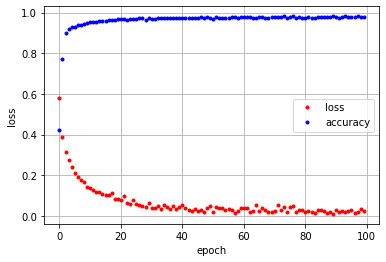

In [6]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']


x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3,label="loss")
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label="accuracy")


plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()